In [64]:
# from src.transforms import MFCCSumTransform, SpectrogramDBTransform, PseudoCQTTransform
import torchaudio
import numpy as np
import matplotlib.pyplot as plt
import librosa
# import nnAudio.Spectrogram
import torch
import yaml
import sox
import soundfile as sf
from itertools import combinations, product

In [10]:
# audio, sr = torchaudio.load("dataset/clean/guitarset_5s/00_BN1-129-Eb_comp_1.wav")
audio, sr = torchaudio.load("dataset/generated/gen_multiFX_10062021/valid/audio/45.wav")

In [11]:
t = torchaudio.transforms.MelSpectrogram(sr, 2048)
output = t(audio)
output.shape

torch.Size([1, 128, 216])

In [ ]:
transform = MFCCSumTransform(sr, 40, {"n_mels": 64})
output = transform(audio)
plt.stem(output[0])

torch.Size([1, 216, 216])


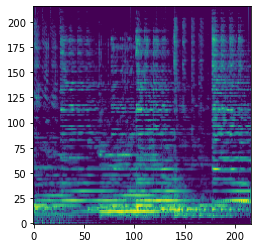

In [13]:
meller = torchaudio.transforms.MelSpectrogram(44100, n_fft=2048, n_mels=216)
output = meller(audio)
print(output.shape)
plt.imshow(librosa.amplitude_to_db(output[0]), origin='lower')

torch.Size([1, 257, 862])


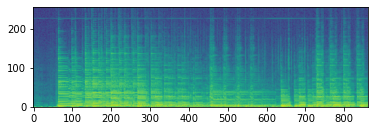

In [6]:
specer = SpectrogramDBTransform(n_fft=512)
output = specer(audio)
print(output.shape)
plt.imshow(output[0], origin='lower')

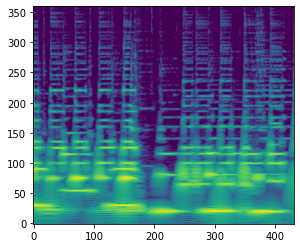

In [13]:
output = librosa.cqt(audio[0].numpy(), sr=44100, fmin=82.41, n_bins=360, bins_per_octave=60)
plt.imshow(librosa.amplitude_to_db(np.abs(output)), origin='lower')

CQT kernels created, time used = 0.3531 seconds
torch.Size([1, 220500])
torch.Size([1, 360, 431])


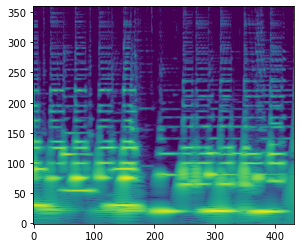

In [20]:
nnaudio_cqter = nnAudio.Spectrogram.CQT(sr=44100, fmin=82.41, n_bins=360, bins_per_octave=60)
print(audio.shape)
output = nnaudio_cqter(audio)
print(output.shape)
plt.imshow(librosa.amplitude_to_db(np.abs(output[0])), origin='lower')

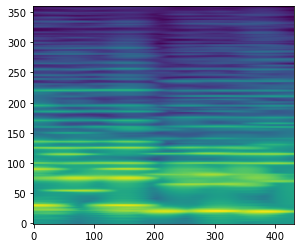

In [18]:
output = librosa.pseudo_cqt(audio[0].numpy(), sr=44100, fmin=82.41, n_bins=360, bins_per_octave=60, hop_length=512)
plt.imshow(librosa.amplitude_to_db(np.abs(output)), origin='lower')

/opt/conda/lib/python3.8/site-packages/scipy/sparse/data.py:72: ComplexWarning: Casting complex values to real discards the imaginary part
  self._deduped_data().astype(dtype, casting=casting, copy=copy),


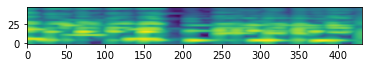

In [9]:
cqter = PseudoCQTTransform()
output = cqter(audio)
plt.imshow(output[0].numpy(), origin='lower')

In [76]:
fx_params = {
    'overdrive': {'gain_db': 5},
    'distortion': {'gain_db': 15},
    'reverb': {'reverberance': 80},
    'feedback_delay': {'n_echos': 3, 'delays': [200,400,600], 'decays':[0.4,0.2,0.1], 'gain_out':0.5},
    'slapback_delay': {'n_echos': 3, 'delays': [200,400,600], 'decays':[0.4,0.2,0.1], 'gain_out':0.5},
    'chorus': {'n_voices': 5},
    'flanger': {'depth': 5, 'phase': 50},
    'phaser': {},
    'tremolo': {},
    'low_boost': {'frequency': 200, 'gain_db': 10},
    'low_reduct': {'frequency': 200, 'gain_db': -10},
    'hi_boost': {'frequency': 8000, 'gain_db': 20},
    'hi_reduct': {'frequency': 8000, 'gain_db': -20},
}
grouping = [
    (0, 1,),
    (2,),
    (3, 4,),
    (5, 6, 7, 8),
    (9, 10,),
    (11, 12,)
]
n_groups = len(grouping)
fx_name_list = list(fx_params.keys())

In [79]:
def apply_fx_to_transformer(transformer, fx, fx_params):
    """
    Append the corresponding fx to the given transformer.
    """
    assert isinstance(transformer, sox.transform.Transformer)
    if fx == 'distortion':
        transformer.overdrive(**fx_params[fx]) # params: {'param1': val1, 'param2', val2}
    elif fx == 'overdrive':
        transformer.overdrive(**fx_params[fx])
    elif fx == 'feedback_delay':
        transformer.echos(**fx_params[fx])
    elif fx == 'slapback_delay':
        transformer.echo(**fx_params[fx])
    elif fx == 'reverb':
        transformer.reverb(**fx_params[fx])
    elif fx == 'chorus':
        transformer.chorus(**fx_params[fx])
    elif fx == 'flanger':
        transformer.flanger(**fx_params[fx])
    elif fx == 'phaser':
        transformer.phaser(**fx_params[fx])
    elif fx == 'tremolo':
        transformer.tremolo(**fx_params[fx])
    elif fx == 'vibrato':
        raise NotImplementedError(fx)
    elif fx == 'low_boost':
        transformer.bass(**fx_params[fx])
    elif fx == 'low_reduct':
        transformer.bass(**fx_params[fx])
    elif fx == 'mid_boost':
        transformer.equalizer(**fx_params[fx])
    elif fx == 'mid_reduct':
        transformer.equalizer(**fx_params[fx])
    elif fx == 'hi_boost':
        transformer.treble(**fx_params[fx])
    elif fx == 'hi_reduct':
        transformer.treble(**fx_params[fx])
    else:
        raise ValueError(f"Invalid effect name: {fx}")

In [80]:
fx_name_list

['overdrive',
 'distortion',
 'reverb',
 'feedback_delay',
 'slapback_delay',
 'chorus',
 'flanger',
 'phaser',
 'tremolo',
 'low_boost',
 'low_reduct',
 'hi_boost',
 'hi_reduct']

In [125]:
tr = sox.transform.Transformer()
tr.reverb()
# tr.tremolo()
tr.echos()
# tr.trim(start_time=0, end_time=5)
# tr.set_output_format(rate=44100, bits=16)

In [126]:
tr.build_file(input_filepath="dataset/clean/guitarset10/00_BN1-129-Eb_comp_0.wav", output_filepath="sample.wav")

output_file: sample.wav already exists and will be overwritten on build


True

In [137]:
from IPython.display import Audio

In [145]:
Audio("b.wav")

In [146]:
Audio("a.wav")